In [8]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import pandas as pd
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

# Ирисы Фишера
Датасет описывает 150 семплов ирисов 3х сортов.
Датасет предствлен реальными ботаническими данными.
## Атрибуты
- *sepal length* (длина чашелистика)
- *sepal width* (ширина чашелистника)
- *petal length* (длина лепестка)
- *petal width* (ширина лепестка)


# Корреляционная матрица

In [9]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
correlation_matrix = iris_df.corr()
correlation_matrix.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.072881,0.860544,0.794806
sepal width (cm),-0.072881,1.000000,-0.394454,-0.329402
petal length (cm),0.860544,-0.394454,1.000000,0.960147
petal width (cm),0.794806,-0.329402,0.960147,1.000000


# Тепловая карта корреляционной матрицы

<Axes: >

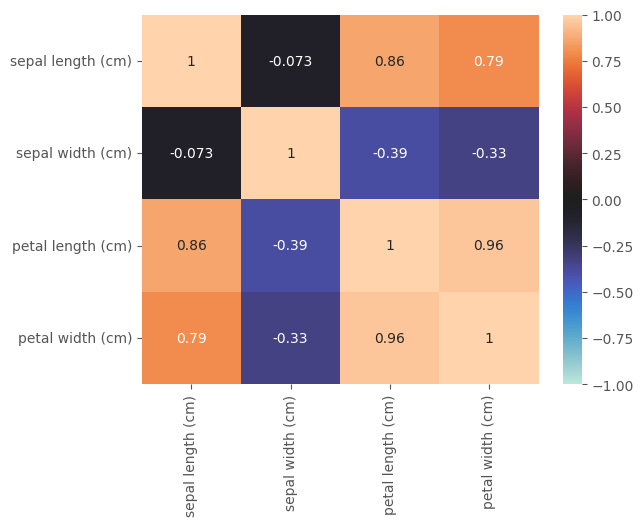

In [10]:
sns.heatmap(correlation_matrix, annot = True, vmin=-1, vmax=1, center= 0)

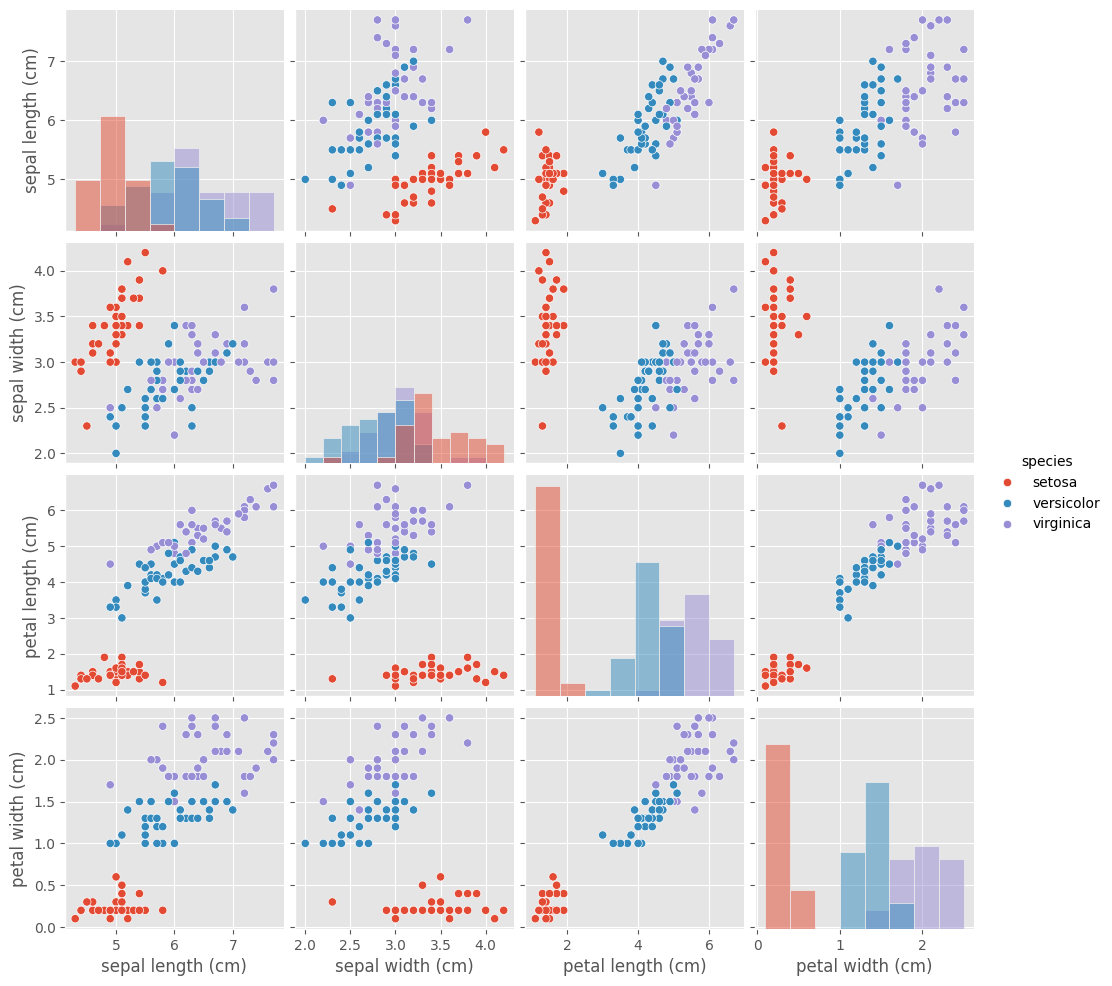

In [11]:
iris_df['species'] = pd.Categorical.from_codes(y_train, iris.target_names)
sns.pairplot(iris_df, hue="species", diag_kind="hist")

# Данные с наибольше корреляцией

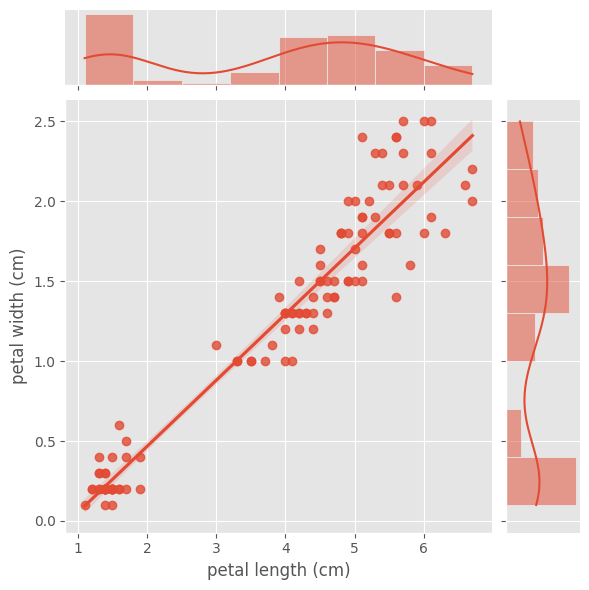

In [12]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", data=iris_df, kind="reg")

# Наменее коллериуемые данные

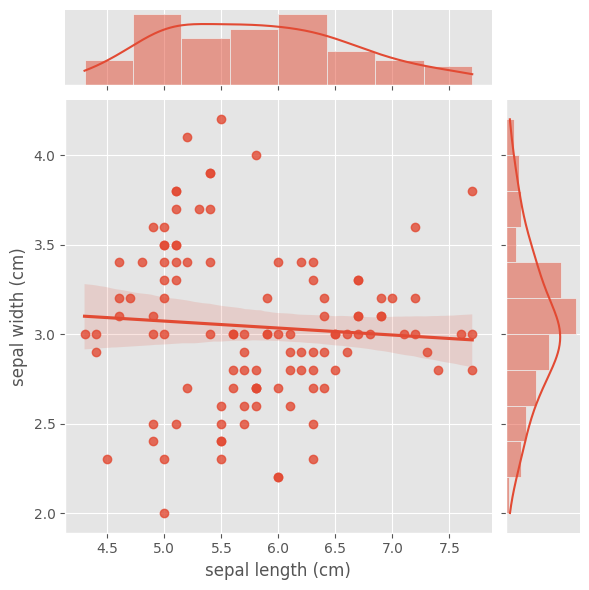

In [13]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df, kind="reg")

# Отдельные гистограммы для каждого признака

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

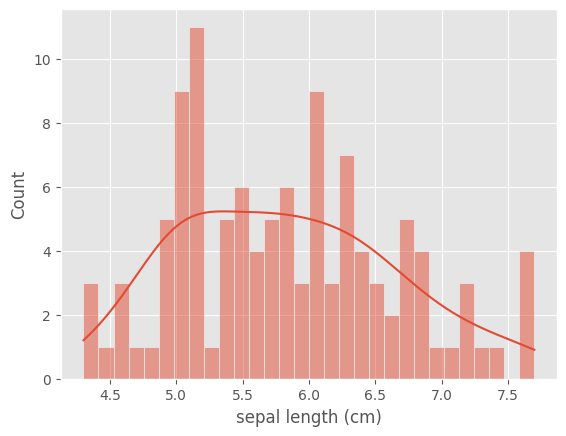

In [14]:
sns.histplot(data=iris_df, x="sepal length (cm)", bins=30, kde=True)

In [15]:
print(f"СКО {np.std(X_train[:,0],ddof=1)}")
print(f"Медиана {np.median(X_train[:,0])}")

СКО 0.8191227218567639
Медиана 5.8


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

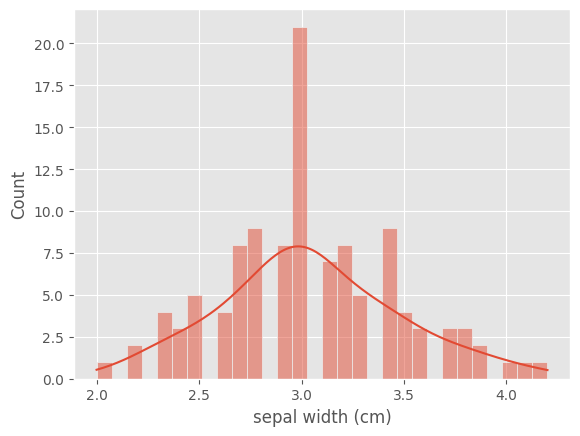

In [16]:
sns.histplot(data=iris_df, x="sepal width (cm)", bins=30, kde=True)

In [17]:
print(f"СКО {np.std(X_train[:,1],ddof=1)}")
print(f"Медиана {np.median(X_train[:,1])}")

СКО 0.4371199397177412
Медиана 3.0


<Axes: xlabel='petal length (cm)', ylabel='Count'>

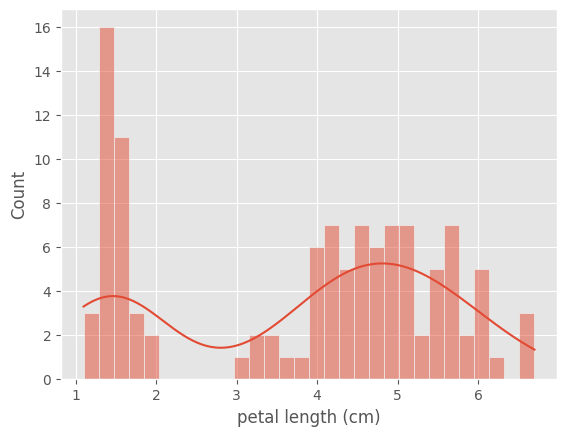

In [18]:
sns.histplot(data=iris_df, x="petal length (cm)", bins=30, kde=True)

In [19]:
print(f"СКО {np.std(X_train[:,2],ddof=1)}")
print(f"Медиана {np.median(X_train[:,2])}")

СКО 1.7353097335345846
Медиана 4.3


<Axes: xlabel='petal width (cm)', ylabel='Count'>

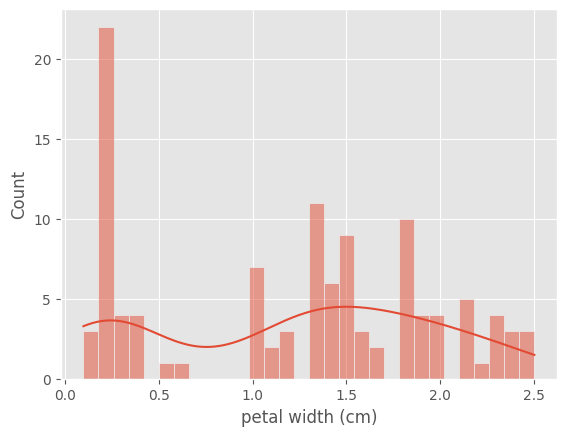

In [20]:
sns.histplot(data=iris_df, x="petal width (cm)", bins=30, kde=True)

In [21]:
print(f"СКО {np.std(X_train[:,3],ddof=1)}")
print(f"Медиана {np.median(X_train[:,3])}")

СКО 0.7479530195364675
Медиана 1.3


# Общая статистика выборки

In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.040179,3.807143,1.214286
std,0.819123,0.437120,1.735310,0.747953
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


# Вывод
В ходе работы был проведен первичный анализ датасета, в датасете не было обнаружено пропущенных значений, в ходе работы были построены гистограммы и диаграммы рассеивания, которые демонстрируют наличие выбросов, коих обнаружено не было (возможно из-за малого размера выборки) и кореляцию данных, также с использованием специальных библиотек были найдены основные статистические параметры датасета, например СКО, средние значения и т.д.